# 3. kNN (Metoda celor mai apropiați vecini)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
train_images = np.loadtxt('data/train_images.txt').astype(np.uint8) 
train_labels = np.loadtxt('data/train_labels.txt').astype(np.uint8) 
test_images = np.loadtxt('data/test_images.txt').astype(np.uint8) 
test_labels = np.loadtxt('data/test_labels.txt').astype(np.uint8) 

### Implementare a unui clasificator kNN

In [7]:
class KnnClassifier:
    
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
        
    def classify_image(self, test_image, num_neighbors=3, metric='l2'):
        
        distances = np.zeros(test_image.shape[0])
        
        if metric == 'l1':
           distances = np.sum((np.abs(self.train_images - test_image)), axis=1)
           
        elif metric == 'l2':
            distances = np.sqrt(np.sum((self.train_images - test_image) ** 2, axis=1))
        
        sorted_indexes = np.argsort(distances)[:num_neighbors]
        nearest_labels = self.train_labels[sorted_indexes]
        
        histogram = np.bincount(nearest_labels)

        return np.argmax(histogram)
    
    def classify_images(self, test_images, num_neighbors=3, metric='l2'):

        num_predictions = test_images.shape[0] 
        predictions = np.zeros(num_predictions)
    
        for i in range(num_predictions):
            predictions[i] = self.classify_image(test_images[i], num_neighbors, metric)
    
        return predictions
        

### Testarea clasificatorului pentru 3 vecini și norma L1

In [8]:
def accuracy(y_true, y_preds):

        return (y_true == y_preds).mean()

In [17]:
knn_classifier = KnnClassifier(train_images, train_labels)

predicted_labels = knn_classifier.classify_images(test_images, num_neighbors=3, metric='l2')

# np.savetxt('predictii_3nn_l2_mnist.txt', predicted_labels)

accuracy(test_labels, predicted_labels)

0.184

### Testarea clasificatorului cu mai mulți hiperparametrii + plotare

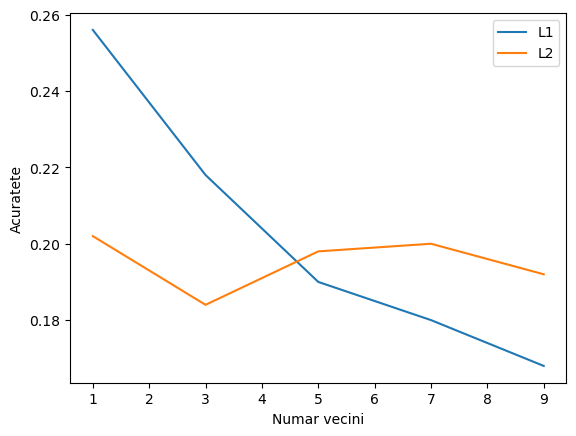

In [18]:
num_neighbors = np.arange(1, 10, 2)
values_l1 = []
values_l2 = []

for num in num_neighbors:

    values_l1.append(accuracy(test_labels, knn_classifier.classify_images(test_images, num, 'l1')))
    values_l2.append(accuracy(test_labels, knn_classifier.classify_images(test_images, num, 'l2')))


plt.plot(num_neighbors, values_l1)
plt.plot(num_neighbors, values_l2)
plt.xlabel('Numar vecini')
plt.ylabel('Acuratete')
plt.legend(['L1', 'L2'])

plt.show()